[View in Colaboratory](https://colab.research.google.com/github/GingerBoredMan/MNIST_Number_Generator/blob/master/GAN.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


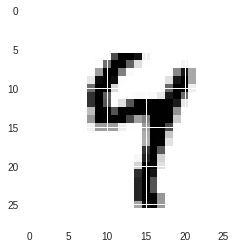

In [4]:
plt.imshow(mnist.train.images[2].reshape(28,28),cmap = 'Greys')

In [0]:
def generator(z, reuse =None):
  with tf.variable_scope('gen', reuse = reuse):
    hidden1 = tf.layers.dense(inputs = z, units = 128)
    hidden1 = tf.nn.leaky_relu(hidden1)
    hidden2 = tf.nn.leaky_relu(tf.layers.dense(inputs = hidden1, units = 128))
    op = tf.layers.dense(hidden2, units = 784, activation = tf.nn.tanh)
    return op

In [0]:
def discriminator(X, reuse =None):
  with tf.variable_scope('dis', reuse = reuse):
    hidden1 = tf.layers.dense(inputs = X, units = 128)
    hidden1 = tf.nn.leaky_relu(hidden1)
    hidden2 = tf.nn.leaky_relu(tf.layers.dense(inputs = hidden1, units = 128))
    logits = tf.layers.dense(hidden2,units = 1)
    op = tf.sigmoid(logits)
    return op,logits

In [0]:
# placeholders

real_images = tf.placeholder(tf.float32, shape = [None,784])
z = tf.placeholder(tf.float32, shape = [None,100])

In [0]:
G = generator(z)

In [0]:
D_output_real, D_logits_real = discriminator(real_images)

In [0]:
D_output_fake, D_logits_fake = discriminator(G,True)

In [0]:
# Loss

def loss_func(logits_in, labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels = labels_in))

In [0]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9)  #*0.9 is for smotthing, helps generalize better
D_fake_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_real))

In [0]:
D_loss = D_real_loss + D_fake_loss

In [0]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

In [0]:
learning_rate = 0.001

In [0]:
tvars = tf.trainable_variables()                       #used when multiple networks interact with each other
dvars = [var for var in tvars if 'dis' in var.name]
gvars = [var for var in tvars if 'gen' in var.name]

In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list = dvars)

In [0]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list = gvars)

In [0]:
batch_size = 100
epochs = 200

In [0]:
init = tf.global_variables_initializer()

In [0]:
samples = []

In [46]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    num_batches = mnist.train.num_examples // batch_size
    
    for i in range(num_batches):
      batch = mnist.train.next_batch(batch_size)
      batch_images = batch[0].reshape((batch_size,784))
      batch_images = batch_images *2 - 1
      batch_z = np.random.uniform(-1,1,size = (batch_size,100))

      _ = sess.run(D_trainer,feed_dict = {real_images:batch_images,z:batch_z})
      _ = sess.run(G_trainer,feed_dict = {z:batch_z})
    
    print("ON EPOCH{}".format(epoch))
  
    sample_z = np.random.uniform(-1,1,size = (1,100))
    gen_sample = sess.run(generator(z,reuse = True),feed_dict={z:sample_z})
    
    samples.append(gen_sample)
  

ON EPOCH0
ON EPOCH1
ON EPOCH2
ON EPOCH3
ON EPOCH4
ON EPOCH5
ON EPOCH6
ON EPOCH7
ON EPOCH8
ON EPOCH9
ON EPOCH10
ON EPOCH11
ON EPOCH12
ON EPOCH13
ON EPOCH14
ON EPOCH15
ON EPOCH16
ON EPOCH17
ON EPOCH18
ON EPOCH19
ON EPOCH20
ON EPOCH21
ON EPOCH22
ON EPOCH23
ON EPOCH24
ON EPOCH25
ON EPOCH26
ON EPOCH27
ON EPOCH28
ON EPOCH29
ON EPOCH30
ON EPOCH31
ON EPOCH32
ON EPOCH33
ON EPOCH34
ON EPOCH35
ON EPOCH36
ON EPOCH37
ON EPOCH38
ON EPOCH39
ON EPOCH40
ON EPOCH41
ON EPOCH42
ON EPOCH43


KeyboardInterrupt: ignored

In [0]:
ses